In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from math import sqrt,pi,exp
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# DATOS TOMADOS AL 2020-05-03

In [2]:
datos = pd.read_excel(r'C:\Users\Kekis\Desktop\COVID.xlsx')

In [3]:
tabla=datos[['TIPO_PACIENTE','EDAD','SEXO','ENTIDAD_RES','RESULTADO']]
tabla.head()

,TIPO_PACIENTE,EDAD,SEXO,ENTIDAD_RES,RESULTADO
0,1,42,2,17,1
1,1,51,1,9,1
2,2,51,2,2,1
3,2,57,2,9,1
4,2,44,1,14,2


In [4]:
positivos=tabla[(tabla.RESULTADO==1)]

In [5]:
tlaxcala=positivos[(positivos.ENTIDAD_RES==29)]
len(tlaxcala)

238

In [6]:
edomex=positivos[(positivos.ENTIDAD_RES==15)]
len(edomex)

3893

In [7]:
nayarit=positivos[(positivos.ENTIDAD_RES==18)]
len(nayarit)

115

In [8]:
BCnorte=positivos[(positivos.ENTIDAD_RES==2)]
len(BCnorte)

1660

In [9]:
gto=positivos[(positivos.ENTIDAD_RES==11)]
len(gto)

308

In [148]:
jalisco=positivos[(positivos.ENTIDAD_RES==14)]
len(jalisco)

417

In [12]:
guerrero=positivos[(positivos.ENTIDAD_RES==12)]
len(guerrero)

342

In [13]:
nuevoleon=positivos[(positivos.ENTIDAD_RES==19)]
len(nuevoleon)

418

In [14]:
quintana=positivos[(positivos.ENTIDAD_RES==23)]
len(quintana)

911

In [15]:
sinaloa=positivos[(positivos.ENTIDAD_RES==25)]
len(sinaloa)

1119

# TLAXCALA m=8 h=12.5

In [16]:
Tl=list(tlaxcala.EDAD)
a,b= min(Tl),max(Tl)
n=len(Tl)

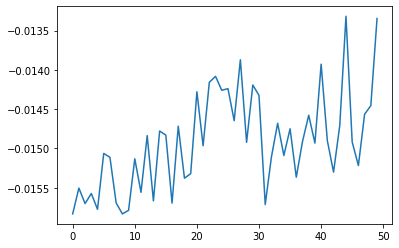

In [17]:
def Error(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tl if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tl if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    J = 2/(h*(n-1))-(n+1)/(h*(n-1))*sum([p[j]**2 for j in range(m)])
    return(J)
plt.plot([Error(m) for m in range(10,60)])

In [18]:
def Histograma(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tl if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tl if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/h*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)])

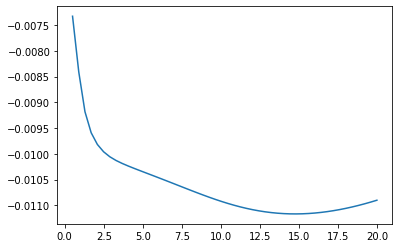

In [19]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K(x)
J = lambda h: 1/(h*n**2)*sum([sum([K_star((Tl[i]-Tl[j])/h) for i in range(n)]) for j in range(n)])+2/(n*h)*K(0)
plt.plot(np.linspace(0.5,20),[J(h) for h in np.linspace(0.5,20)])

In [20]:
def kernel(h):
    fn = lambda x:(1/n)*sum([(1/h)*K((x-Tl[i])/h) for i in range(n)])
    plt.plot(np.linspace(a,b,100),[fn(x) for x in np.linspace(a,b,100)],lw=2)

In [21]:
@interact(m=widgets.IntSlider(
    value=8,
    min=1,
    max=289,
    step=1,
    description='m:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h=widgets.FloatSlider(
    value=12.5,
    min=0,
    max=20,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m,h):
    H = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tl if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tl if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/H*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='blue')
    fn = lambda x:(1/n)*sum([(1/h)*K((x-Tl[i])/h) for i in range(n)])
    plt.plot(np.linspace(a,b,100),[fn(x) for x in np.linspace(a,b,100)],color='orange',lw=2)

interactive(children=(IntSlider(value=8, continuous_update=False, description='m:', max=289, min=1), FloatSlid…

# ESTADO DE MÉXICO m=55 h=12.5

In [22]:
EM=list(edomex[(edomex.EDAD>5)&(edomex.EDAD<90)].EDAD)[0:1000]
a1,b1= min(EM),max(EM)
n1=len(EM)

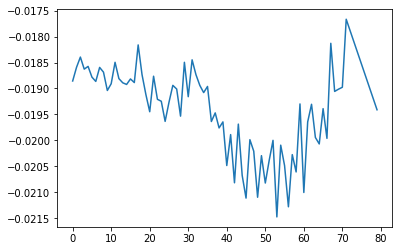

In [23]:
def Error(m1):
    h1 = (b1-a1)/m1
    Y1=[]
    p1 = []
    for j in range(m1):
        Y1.append(len([x for x in EM if x>=j*(b1-a1)/m1 and x<(j+1)*(b1-a1)/m1]))
        p1.append(len([x for x in EM if x>=j*(b1-a1)/m1 and x<(j+1)*(b1-a1)/m1])/n1)
    J1 = 2/(h1*(n1-1))-(n1+1)/(h1*(n1-1))*sum([p1[j]**2 for j in range(m1)])
    return(J1)
plt.plot([Error(m1) for m1 in range(10,90)])

In [24]:
def Histograma(m1):
    h1 = (b1-a1)/m1
    Y1=[]
    p1 = []
    for j in range(m1):
        Y1.append(len([x for x in EM if x>=j*(b1-a1)/m1 and x<(j+1)*(b1-a1)/m1]))
        p1.append(len([x for x in EM if x>=j*(b1-a1)/m1 and x<(j+1)*(b1-a1)/m1])/n1)
    fn1 = lambda x: sum([p1[j]/h1*(x>=j*(b1-a1)/m1 and x<(j+1)*(b1-a1)/m1) for j in range(m1)])
    plt.step(np.linspace(a1,b1),[fn1(x) for x in np.linspace(a1,b1)])

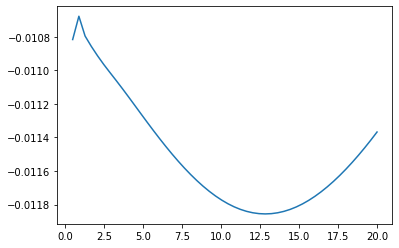

In [25]:
K1 = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K1_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K1(x)
J1 = lambda h1: 1/(h1*n1**2)*sum([sum([K1_star((EM[i]-EM[j])/h1) for i in range(n1)]) for j in range(n1)])+2/(n1*h1)*K1(0)
plt.plot(np.linspace(0.5,20),[J1(h1) for h1 in np.linspace(0.5,20)])

In [26]:
def kernel(h1):
    fn1 = lambda x:(1/n1)*sum([(1/h1)*K1((x-EM[i])/h1) for i in range(n1)])
    plt.plot(np.linspace(a1,b1,100),[fn1(x) for x in np.linspace(a1,b1,100)],lw=2)

In [27]:
@interact(m1=widgets.IntSlider(
    value=55,
    min=1,
    max=100,
    step=1,
    description='m1:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h1=widgets.FloatSlider(
    value=12.5,
    min=0,
    max=20,
    step=0.1,
    description='h1:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m1,h1):
    H1 = (b1-a1)/m1
    Y1=[]
    p1 = []
    for j in range(m1):
        Y1.append(len([x for x in EM if x>=j*(b1-a1)/m1 and x<(j+1)*(b1-a1)/m1]))
        p1.append(len([x for x in EM if x>=j*(b1-a1)/m1 and x<(j+1)*(b1-a1)/m1])/n1)
    fn1 = lambda x: sum([p1[j]/H1*(x>=j*(b1-a1)/m1 and x<(j+1)*(b1-a1)/m1) for j in range(m1)])
    plt.step(np.linspace(a1,b1),[fn1(x) for x in np.linspace(a1,b1)],color='red')
    fn1 = lambda x:(1/n1)*sum([(1/h1)*K1((x-EM[i])/h1) for i in range(n1)])
    plt.plot(np.linspace(a1,b1,100),[fn1(x) for x in np.linspace(a1,b1,100)],color='green',lw=2)

interactive(children=(IntSlider(value=55, continuous_update=False, description='m1:', min=1), FloatSlider(valu…

# NAYARIT  m=10 h=13

In [28]:
NY=list(nayarit.EDAD)
a2,b2= min(NY),max(NY)
n2=len(NY)

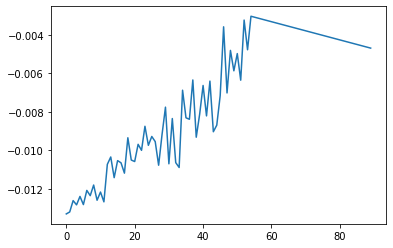

In [29]:
def Error(m2):
    h2 = (b2-a2)/m2
    Y2=[]
    p2 = []
    for j in range(m2):
        Y2.append(len([x for x in NY if x>=j*(b2-a2)/m2 and x<(j+1)*(b2-a2)/m2]))
        p2.append(len([x for x in NY if x>=j*(b2-a2)/m2 and x<(j+1)*(b2-a2)/m2])/n2)
    J2 = 2/(h2*(n2-1))-(n2+1)/(h2*(n2-1))*sum([p2[j]**2 for j in range(m2)])
    return(J2)
plt.plot([Error(m2) for m2 in range(10,100)])

In [30]:
def Histograma(m2):
    h2 = (b2-a2)/m2
    Y2=[]
    p2 = []
    for j in range(m2):
        Y2.append(len([x for x in NY if x>=j*(b2-a2)/m2 and x<(j+1)*(b2-a2)/m2]))
        p2.append(len([x for x in NY if x>=j*(b2-a2)/m2 and x<(j+1)*(b2-a2)/m2])/n2)
    fn2 = lambda x: sum([p2[j]/h2*(x>=j*(b2-a2)/m2 and x<(j+1)*(b2-a2)/m2) for j in range(m2)])
    plt.step(np.linspace(a2,b2),[fn2(x) for x in np.linspace(a2,b2)])

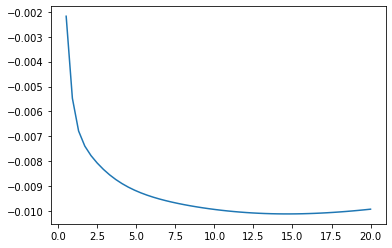

In [31]:
K2 = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K2_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K2(x)
J2 = lambda h2: 1/(h2*n2**2)*sum([sum([K2_star((NY[i]-NY[j])/h2) for i in range(n2)]) for j in range(n2)])+2/(n2*h2)*K2(0)
plt.plot(np.linspace(0.5,20),[J2(h2) for h2 in np.linspace(0.5,20)])

In [32]:
def kernel(h2):
    fn2 = lambda x:(1/n2)*sum([(1/h2)*K2((x-NY[i])/h2) for i in range(n2)])
    plt.plot(np.linspace(a2,b2,100),[fn2(x) for x in np.linspace(a2,b2,100)],lw=2)

In [33]:
@interact(m2=widgets.IntSlider(
    value=10,
    min=1,
    max=100,
    step=1,
    description='m2:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h2=widgets.FloatSlider(
    value=13,
    min=1,
    max=20,
    step=0.1,
    description='h2:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m2,h2):
    H2 = (b2-a2)/m2
    Y2=[]
    p2 = []
    for j in range(m2):
        Y2.append(len([x for x in NY if x>=j*(b2-a2)/m2 and x<(j+1)*(b2-a2)/m2]))
        p2.append(len([x for x in NY if x>=j*(b2-a2)/m2 and x<(j+1)*(b2-a2)/m2])/n2)
    fn2 = lambda x: sum([p2[j]/H2*(x>=j*(b2-a2)/m2 and x<(j+1)*(b2-a2)/m2) for j in range(m2)])
    plt.step(np.linspace(a2,b2),[fn2(x) for x in np.linspace(a2,b2)],color='blue')
    fn2 = lambda x:(1/n2)*sum([(1/h2)*K2((x-NY[i])/h2) for i in range(n2)])
    plt.plot(np.linspace(a2,b2,100),[fn2(x) for x in np.linspace(a2,b2,100)],color='purple',lw=2)

interactive(children=(IntSlider(value=10, continuous_update=False, description='m2:', min=1), FloatSlider(valu…

# BAJA CALIFORNIA NORTE m=45 h=12.5

In [34]:
BC=list(BCnorte[(BCnorte.EDAD>5)&(BCnorte.EDAD<90)].EDAD)[0:500]
a3,b3= min(BC),max(BC)
n3=len(BC)

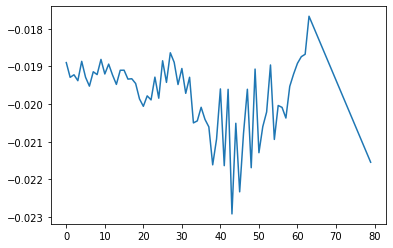

In [35]:
def Error(m3):
    h3 = (b3-a3)/m3
    Y3=[]
    p3 = []
    for j in range(m3):
        Y3.append(len([x for x in BC if x>=j*(b3-a3)/m3 and x<(j+1)*(b3-a3)/m3]))
        p3.append(len([x for x in BC if x>=j*(b3-a3)/m3 and x<(j+1)*(b3-a3)/m3])/n3)
    J3 = 2/(h3*(n3-1))-(n3+1)/(h3*(n3-1))*sum([p3[j]**2 for j in range(m3)])
    return(J3)
plt.plot([Error(m3) for m3 in range(10,90)])

In [36]:
def Histograma(m3):
    h3 = (b3-a3)/m3
    Y3=[]
    p3 = []
    for j in range(m3):
        Y3.append(len([x for x in BC if x>=j*(b3-a3)/m3 and x<(j+1)*(b3-a3)/m3]))
        p3.append(len([x for x in BC if x>=j*(b3-a3)/m3 and x<(j+1)*(b3-a3)/m3])/n3)
    fn3 = lambda x: sum([p3[j]/h3*(x>=j*(b3-a3)/m3 and x<(j+1)*(b3-a3)/m3) for j in range(m3)])
    plt.step(np.linspace(a3,b3),[fn3(x) for x in np.linspace(a3,b3)])

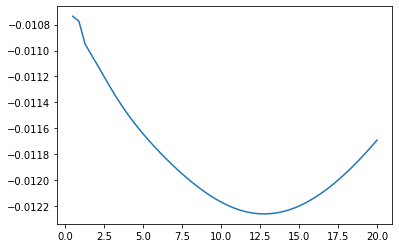

In [37]:
K3 = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K3_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K3(x)
J3 = lambda h3: 1/(h3*n3**2)*sum([sum([K3_star((BC[i]-BC[j])/h3) for i in range(n3)]) for j in range(n3)])+2/(n3*h3)*K3(0)
plt.plot(np.linspace(0.5,20),[J3(h3) for h3 in np.linspace(0.5,20)])

In [38]:
def kernel(h3):
    fn3 = lambda x:(1/n3)*sum([(1/h3)*K3((x-BC[i])/h3) for i in range(n3)])
    plt.plot(np.linspace(a3,b3,100),[fn3(x) for x in np.linspace(a3,b3,100)],lw=2)

In [39]:
@interact(m3=widgets.IntSlider(
    value=45,
    min=1,
    max=100,
    step=1,
    description='m3:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h3=widgets.FloatSlider(
    value=12.5,
    min=1,
    max=20,
    step=0.1,
    description='h3:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m3,h3):
    H3 = (b3-a3)/m3
    Y3=[]
    p3 = []
    for j in range(m3):
        Y3.append(len([x for x in BC if x>=j*(b3-a3)/m3 and x<(j+1)*(b3-a3)/m3]))
        p3.append(len([x for x in BC if x>=j*(b3-a3)/m3 and x<(j+1)*(b3-a3)/m3])/n3)
    fn3 = lambda x: sum([p3[j]/H3*(x>=j*(b3-a3)/m3 and x<(j+1)*(b3-a3)/m3) for j in range(m3)])
    plt.step(np.linspace(a3,b3),[fn3(x) for x in np.linspace(a3,b3)],color='black')
    fn3 = lambda x:(1/n3)*sum([(1/h3)*K3((x-BC[i])/h3) for i in range(n3)])
    plt.plot(np.linspace(a3,b3,100),[fn3(x) for x in np.linspace(a3,b3,100)],lw=2)

interactive(children=(IntSlider(value=45, continuous_update=False, description='m3:', min=1), FloatSlider(valu…

# GUANAJUATO m=57 h=16.5

In [40]:
GTO=list(gto.EDAD)
a4,b4= min(GTO),max(GTO)
n4=len(GTO)

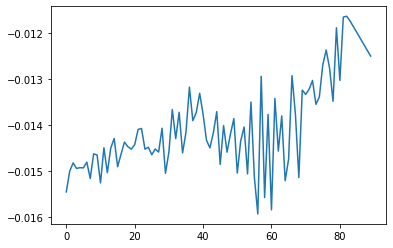

In [41]:
def Error(m4):
    h4 = (b4-a4)/m4
    Y4=[]
    p4 = []
    for j in range(m4):
        Y4.append(len([x for x in GTO if x>=j*(b4-a4)/m4 and x<(j+1)*(b4-a4)/m4]))
        p4.append(len([x for x in GTO if x>=j*(b4-a4)/m4 and x<(j+1)*(b4-a4)/m4])/n4)
    J4 = 2/(h4*(n4-1))-(n4+1)/(h4*(n4-1))*sum([p4[j]**2 for j in range(m4)])
    return(J4)
plt.plot([Error(m4) for m4 in range(10,100)],)

In [42]:
def Histograma(m4):
    h4 = (b4-a4)/m4
    Y4=[]
    p4 = []
    for j in range(m4):
        Y4.append(len([x for x in GTO if x>=j*(b4-a4)/m4 and x<(j+1)*(b4-a4)/m4]))
        p4.append(len([x for x in GTO if x>=j*(b4-a4)/m4 and x<(j+1)*(b4-a4)/m4])/n4)
    fn4 = lambda x: sum([p4[j]/h4*(x>=j*(b4-a4)/m4 and x<(j+1)*(b4-a4)/m4) for j in range(m4)])
    plt.step(np.linspace(a4,b4),[fn4(x) for x in np.linspace(a4,b4)])

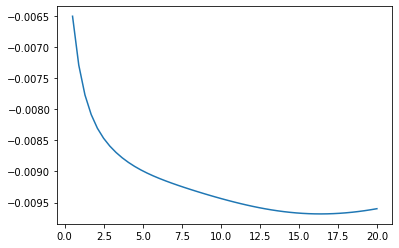

In [43]:
K4 = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K4_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K4(x)
J4 = lambda h4: 1/(h4*n4**2)*sum([sum([K4_star((GTO[i]-GTO[j])/h4) for i in range(n4)]) for j in range(n4)])+2/(n4*h4)*K4(0)
plt.plot(np.linspace(0.5,20),[J4(h4) for h4 in np.linspace(0.5,20)])

In [44]:
def kernel(h4):
    fn4 = lambda x:(1/n4)*sum([(1/h4)*K4((x-GTO[i])/h4) for i in range(n4)])
    plt.plot(np.linspace(a4,b4,100),[fn4(x) for x in np.linspace(a4,b4,100)],lw=2)

In [45]:
@interact(m4=widgets.IntSlider(
    value=57,
    min=1,
    max=100,
    step=1,
    description='m4:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h4=widgets.FloatSlider(
    value=16.5,
    min=1,
    max=20,
    step=0.1,
    description='h4:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m4,h4):
    H4 = (b4-a4)/m4
    Y4=[]
    p4 = []
    for j in range(m4):
        Y4.append(len([x for x in GTO if x>=j*(b4-a4)/m4 and x<(j+1)*(b4-a4)/m4]))
        p4.append(len([x for x in GTO if x>=j*(b4-a4)/m4 and x<(j+1)*(b4-a4)/m4])/n4)
    fn4 = lambda x: sum([p4[j]/H4*(x>=j*(b4-a4)/m4 and x<(j+1)*(b4-a4)/m4) for j in range(m4)])
    plt.step(np.linspace(a4,b4),[fn4(x) for x in np.linspace(a4,b4)])
    fn4 = lambda x:(1/n4)*sum([(1/h4)*K4((x-GTO[i])/h4) for i in range(n4)])
    plt.plot(np.linspace(a4,b4,100),[fn4(x) for x in np.linspace(a4,b4,100)],color='black',lw=2)

interactive(children=(IntSlider(value=57, continuous_update=False, description='m4:', min=1), FloatSlider(valu…

# JALISCO m=51 h=14.9

In [46]:
JLS=list(jalisco.EDAD)
a5,b5= min(JLS),max(JLS)
n5=len(JLS)

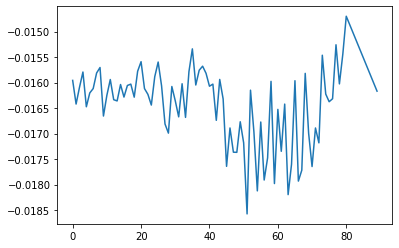

In [47]:
def Error(m5):
    h5 = (b5-a5)/m5
    Y5=[]
    p5 = []
    for j in range(m5):
        Y5.append(len([x for x in JLS if x>=j*(b5-a5)/m5 and x<(j+1)*(b5-a5)/m5]))
        p5.append(len([x for x in JLS if x>=j*(b5-a5)/m5 and x<(j+1)*(b5-a5)/m5])/n5)
    J5 = 2/(h5*(n5-1))-(n5+1)/(h5*(n5-1))*sum([p5[j]**2 for j in range(m5)])
    return(J5)
plt.plot([Error(m5) for m5 in range(10,100)])

In [48]:
def Histograma(m5):
    h5 = (b5-a5)/m5
    Y5=[]
    p5 = []
    for j in range(m5):
        Y5.append(len([x for x in JLS if x>=j*(b5-a5)/m5 and x<(j+1)*(b5-a5)/m5]))
        p5.append(len([x for x in JLS if x>=j*(b5-a5)/m5 and x<(j+1)*(b5-a5)/m5])/n5)
    fn5 = lambda x: sum([p5[j]/h5*(x>=j*(b5-a5)/m5 and x<(j+1)*(b5-a5)/m5) for j in range(m5)])
    plt.step(np.linspace(a5,b5),[fn5(x) for x in np.linspace(a5,b5)])

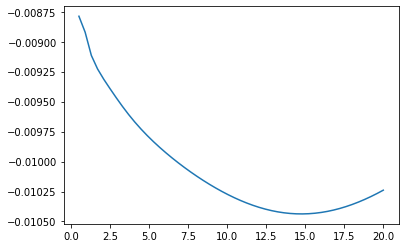

In [49]:
K5 = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K5_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K5(x)
J5 = lambda h5: 1/(h5*n5**2)*sum([sum([K5_star((JLS[i]-JLS[j])/h5) for i in range(n5)]) for j in range(n5)])+2/(n5*h5)*K5(0)
plt.plot(np.linspace(0.5,20),[J5(h5) for h5 in np.linspace(0.5,20)])

In [50]:
def kernel(h5):
    fn5 = lambda x:(1/n5)*sum([(1/h5)*K5((x-JLS[i])/h5) for i in range(n5)])
    plt.plot(np.linspace(a5,b5,100),[fn5(x) for x in np.linspace(a5,b5,100)],lw=2)

In [51]:
@interact(m5=widgets.IntSlider(
    value=51,
    min=1,
    max=100,
    step=1,
    description='m5:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h5=widgets.FloatSlider(
    value=14.9,
    min=1,
    max=20,
    step=0.1,
    description='h5:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m5,h5):
    H5 = (b5-a5)/m5
    Y5=[]
    p5 = []
    for j in range(m5):
        Y5.append(len([x for x in JLS if x>=j*(b5-a5)/m5 and x<(j+1)*(b5-a5)/m5]))
        p5.append(len([x for x in JLS if x>=j*(b5-a5)/m5 and x<(j+1)*(b5-a5)/m5])/n5)
    fn5 = lambda x: sum([p5[j]/H5*(x>=j*(b5-a5)/m5 and x<(j+1)*(b5-a5)/m5) for j in range(m5)])
    plt.step(np.linspace(a5,b5),[fn5(x) for x in np.linspace(a5,b5)],color='green')
    fn5 = lambda x:(1/n5)*sum([(1/h5)*K5((x-JLS[i])/h5) for i in range(n5)])
    plt.plot(np.linspace(a5,b5,100),[fn5(x) for x in np.linspace(a5,b5,100)],lw=2)

interactive(children=(IntSlider(value=51, continuous_update=False, description='m5:', min=1), FloatSlider(valu…

# GUERRERO m=60 h=13.5

In [52]:
GRO=list(guerrero.EDAD)
a6,b6= min(GRO),max(GRO)
n6=len(GRO)

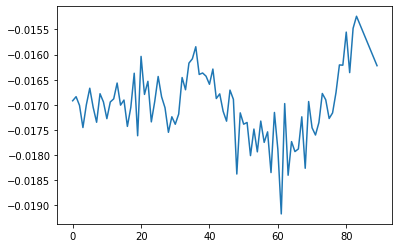

In [53]:
def Error(m6):
    h6 = (b6-a6)/m6
    Y6=[]
    p6 = []
    for j in range(m6):
        Y6.append(len([x for x in GRO if x>=j*(b6-a6)/m6 and x<(j+1)*(b6-a6)/m6]))
        p6.append(len([x for x in GRO if x>=j*(b6-a6)/m6 and x<(j+1)*(b6-a6)/m6])/n6)
    J6 = 2/(h6*(n6-1))-(n6+1)/(h6*(n6-1))*sum([p6[j]**2 for j in range(m6)])
    return(J6)
plt.plot([Error(m6) for m6 in range(10,100)])

In [54]:
def Histograma(m6):
    h6 = (b6-a6)/m6
    Y6=[]
    p6 = []
    for j in range(m6):
        Y6.append(len([x for x in GRO if x>=j*(b6-a6)/m6 and x<(j+1)*(b6-a6)/m6]))
        p6.append(len([x for x in GRO if x>=j*(b6-a6)/m6 and x<(j+1)*(b6-a6)/m6])/n6)
    fn6 = lambda x: sum([p6[j]/h6*(x>=j*(b6-a6)/m6 and x<(j+1)*(b6-a6)/m6) for j in range(m6)])
    plt.step(np.linspace(a6,b6),[fn6(x) for x in np.linspace(a6,b6)])

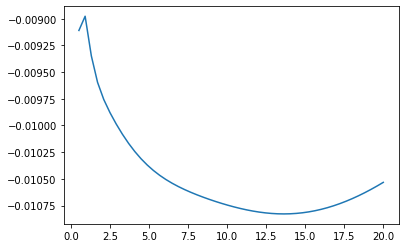

In [55]:
K6 = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K6_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K6(x)
J6 = lambda h6: 1/(h6*n6**2)*sum([sum([K6_star((GRO[i]-GRO[j])/h6) for i in range(n6)]) for j in range(n6)])+2/(n6*h6)*K6(0)
plt.plot(np.linspace(0.5,20),[J6(h6) for h6 in np.linspace(0.5,20)])

In [56]:
def kernel(h6):
    fn6 = lambda x:(1/n6)*sum([(1/h6)*K6((x-GRO[i])/h6) for i in range(n6)])
    plt.plot(np.linspace(a6,b6,100),[fn6(x) for x in np.linspace(a6,b6,100)],lw=2)

In [57]:
@interact(m6=widgets.IntSlider(
    value=60,
    min=1,
    max=100,
    step=1,
    description='m6:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h6=widgets.FloatSlider(
    value=13.5,
    min=1,
    max=20,
    step=0.1,
    description='h6:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m6,h6):
    H6 = (b6-a6)/m6
    Y6=[]
    p6 = []
    for j in range(m6):
        Y6.append(len([x for x in GRO if x>=j*(b6-a6)/m6 and x<(j+1)*(b6-a6)/m6]))
        p6.append(len([x for x in GRO if x>=j*(b6-a6)/m6 and x<(j+1)*(b6-a6)/m6])/n6)
    fn6 = lambda x: sum([p6[j]/H6*(x>=j*(b6-a6)/m6 and x<(j+1)*(b6-a6)/m6) for j in range(m6)])
    plt.step(np.linspace(a6,b6),[fn6(x) for x in np.linspace(a6,b6)],color='purple')
    fn6 = lambda x:(1/n6)*sum([(1/h6)*K6((x-GRO[i])/h6) for i in range(n6)])
    plt.plot(np.linspace(a6,b6,100),[fn6(x) for x in np.linspace(a6,b6,100)],color='orange',lw=2)
    

interactive(children=(IntSlider(value=60, continuous_update=False, description='m6:', min=1), FloatSlider(valu…

# NUEVO LEON  m=70 h=12.5

In [58]:
NL=list(nuevoleon.EDAD)
a7,b7= min(NL),max(NL)
n7=len(NL)

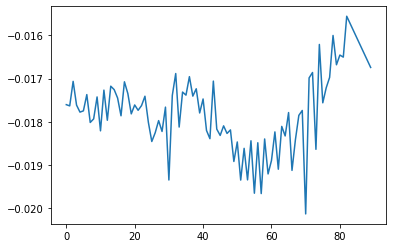

In [59]:
def Error(m7):
    h7 = (b7-a7)/m7
    Y7=[]
    p7 = []
    for j in range(m7):
        Y7.append(len([x for x in NL if x>=j*(b7-a7)/m7 and x<(j+1)*(b7-a7)/m7]))
        p7.append(len([x for x in NL if x>=j*(b7-a7)/m7 and x<(j+1)*(b7-a7)/m7])/n7)
    J7 = 2/(h7*(n7-1))-(n7+1)/(h7*(n7-1))*sum([p7[j]**2 for j in range(m7)])
    return(J7)
plt.plot([Error(m7) for m7 in range(10,100)])

In [60]:
def Histograma(m7):
    h7 = (b7-a7)/m7
    Y7=[]
    p7 = []
    for j in range(m7):
        Y7.append(len([x for x in NL if x>=j*(b7-a7)/m7 and x<(j+1)*(b7-a7)/m7]))
        p7.append(len([x for x in NL if x>=j*(b7-a7)/m7 and x<(j+1)*(b7-a7)/m7])/n7)
    fn7 = lambda x: sum([p7[j]/h7*(x>=j*(b7-a7)/m7 and x<(j+1)*(b7-a7)/m7) for j in range(m7)])
    plt.step(np.linspace(a7,b7),[fn7(x) for x in np.linspace(a7,b7)])

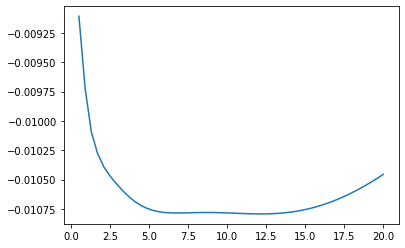

In [61]:
K7 = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K7_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K7(x)
J7 = lambda h7: 1/(h7*n7**2)*sum([sum([K7_star((NL[i]-NL[j])/h7) for i in range(n7)]) for j in range(n7)])+2/(n7*h7)*K7(0)
plt.plot(np.linspace(0.5,20),[J7(h7) for h7 in np.linspace(0.5,20)])

In [62]:
def kernel(h7):
    fn7 = lambda x:(1/n7)*sum([(1/h7)*K7((x-NL[i])/h7) for i in range(n7)])
    plt.plot(np.linspace(a7,b7,100),[fn7(x) for x in np.linspace(a7,b7,100)],lw=2)

In [63]:
@interact(m7=widgets.IntSlider(
    value=70,
    min=1,
    max=100,
    step=1,
    description='m7:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h7=widgets.FloatSlider(
    value=12.5,
    min=1,
    max=20,
    step=0.1,
    description='h7:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m7,h7):
    H7 = (b7-a7)/m7
    Y7=[]
    p7 = []
    for j in range(m7):
        Y7.append(len([x for x in NL if x>=j*(b7-a7)/m7 and x<(j+1)*(b7-a7)/m7]))
        p7.append(len([x for x in NL if x>=j*(b7-a7)/m7 and x<(j+1)*(b7-a7)/m7])/n7)
    fn7 = lambda x: sum([p7[j]/H7*(x>=j*(b7-a7)/m7 and x<(j+1)*(b7-a7)/m7) for j in range(m7)])
    plt.step(np.linspace(a7,b7),[fn7(x) for x in np.linspace(a7,b7)],color='green')
    fn7 = lambda x:(1/n7)*sum([(1/h7)*K7((x-NL[i])/h7) for i in range(n7)])
    plt.plot(np.linspace(a7,b7,100),[fn7(x) for x in np.linspace(a7,b7,100)],color='purple',lw=2)

interactive(children=(IntSlider(value=70, continuous_update=False, description='m7:', min=1), FloatSlider(valu…

# QUINTANA ROO m=70 h=11

In [64]:
QRO=list(quintana.EDAD)
a8,b8= min(QRO),max(QRO)
n8=len(QRO)

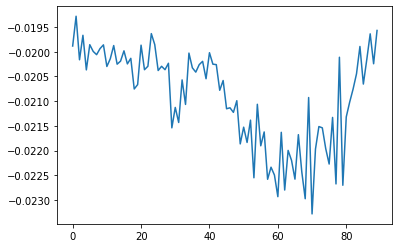

In [65]:
def Error(m8):
    h8 = (b8-a8)/m8
    Y8=[]
    p8 = []
    for j in range(m8):
        Y8.append(len([x for x in QRO if x>=j*(b8-a8)/m8 and x<(j+1)*(b8-a8)/m8]))
        p8.append(len([x for x in QRO if x>=j*(b8-a8)/m8 and x<(j+1)*(b8-a8)/m8])/n8)
    J8 = 2/(h8*(n8-1))-(n8+1)/(h8*(n8-1))*sum([p8[j]**2 for j in range(m8)])
    return(J8)
plt.plot([Error(m8) for m8 in range(10,100)])

In [66]:
def Histograma(m8):
    h8 = (b8-a8)/m8
    Y8=[]
    p8 = []
    for j in range(m8):
        Y8.append(len([x for x in QRO if x>=j*(b8-a8)/m8 and x<(j+1)*(b8-a8)/m8]))
        p8.append(len([x for x in QRO if x>=j*(b8-a8)/m8 and x<(j+1)*(b8-a8)/m8])/n8)
    fn8 = lambda x: sum([p8[j]/h8*(x>=j*(b8-a8)/m8 and x<(j+1)*(b8-a8)/m8) for j in range(m8)])
    plt.step(np.linspace(a8,b8),[fn8(x) for x in np.linspace(a8,b8)])

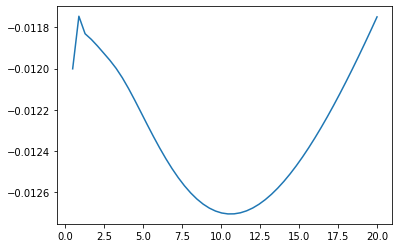

In [67]:
K8 = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K8_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K8(x)
J8 = lambda h8: 1/(h8*n8**2)*sum([sum([K8_star((QRO[i]-QRO[j])/h8) for i in range(n8)]) for j in range(n8)])+2/(n8*h8)*K8(0)
plt.plot(np.linspace(0.5,20),[J8(h8) for h8 in np.linspace(0.5,20)])

In [68]:
def kernel(h8):
    fn8 = lambda x:(1/n8)*sum([(1/h8)*K8((x-QRO[i])/h8) for i in range(n8)])
    plt.plot(np.linspace(a8,b8,100),[fn8(x) for x in np.linspace(a8,b8,100)],lw=2)

In [69]:
@interact(m8=widgets.IntSlider(
    value=70,
    min=1,
    max=100,
    step=1,
    description='m8:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h8=widgets.FloatSlider(
    value=11,
    min=1,
    max=20,
    step=0.1,
    description='h8:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m8,h8):
    H8 = (b8-a8)/m8
    Y8=[]
    p8 = []
    for j in range(m8):
        Y8.append(len([x for x in QRO if x>=j*(b8-a8)/m8 and x<(j+1)*(b8-a8)/m8]))
        p8.append(len([x for x in QRO if x>=j*(b8-a8)/m8 and x<(j+1)*(b8-a8)/m8])/n8)
    fn8 = lambda x: sum([p8[j]/H8*(x>=j*(b8-a8)/m8 and x<(j+1)*(b8-a8)/m8) for j in range(m8)])
    plt.step(np.linspace(a8,b8),[fn8(x) for x in np.linspace(a8,b8)],color='yellow')
    fn8 = lambda x:(1/n8)*sum([(1/h8)*K8((x-QRO[i])/h8) for i in range(n8)])
    plt.plot(np.linspace(a8,b8,100),[fn8(x) for x in np.linspace(a8,b8,100)],color='red',lw=2)

interactive(children=(IntSlider(value=70, continuous_update=False, description='m8:', min=1), FloatSlider(valu…

# SINALOA m=69 h=12.5

In [70]:
SN=list(sinaloa.EDAD)
a9,b9= min(SN),max(SN)
n9=len(SN)

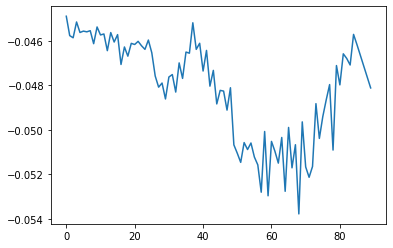

In [71]:
def Error(m9):
    h9 = (b9-a9)/m9
    Y9=[]
    p9 = []
    for j in range(m9):
        Y9.append(len([x for x in SN if x>=j*(b9-a9)/m9 and x<(j+1)*(b9-a9)/m9]))
        p9.append(len([x for x in SN if x>=j*(b9-a9)/m9 and x<(j+1)*(b9-a9)/m9])/n9)
    J9 = 2/(h9*(n9-1))-(n9+1)/(h9*(n5-1))*sum([p9[j]**2 for j in range(m9)])
    return(J9)
plt.plot([Error(m9) for m9 in range(10,100)])

In [72]:
def Histograma(m9):
    h9 = (b9-a9)/m9
    Y9=[]
    p9 = []
    for j in range(m9):
        Y9.append(len([x for x in SN if x>=j*(b9-a9)/m9 and x<(j+1)*(b9-a9)/m9]))
        p9.append(len([x for x in SN if x>=j*(b9-a9)/m9 and x<(j+1)*(b9-a9)/m9])/n9)
    fn9 = lambda x: sum([p9[j]/h9*(x>=j*(b9-a9)/m9 and x<(j+1)*(b9-a9)/m9) for j in range(m9)])
    plt.step(np.linspace(a9,b9),[fn9(x) for x in np.linspace(a9,b9)])

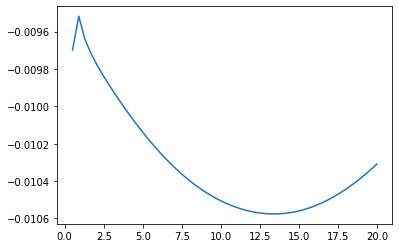

In [73]:
K9 = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K9_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K9(x)
J9 = lambda h9: 1/(h9*n9**2)*sum([sum([K9_star((SN[i]-SN[j])/h9) for i in range(n9)]) for j in range(n9)])+2/(n9*h9)*K9(0)
plt.plot(np.linspace(0.5,20),[J9(h9) for h9 in np.linspace(0.5,20)])

In [74]:
def kernel(h9):
    fn9 = lambda x:(1/n9)*sum([(1/h9)*K9((x-SN[i])/h9) for i in range(n9)])
    plt.plot(np.linspace(a9,b9,100),[fn9(x) for x in np.linspace(a9,b9,100)],lw=2)

In [75]:
@interact(m9=widgets.IntSlider(
    value=69,
    min=1,
    max=100,
    step=1,
    description='m9:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h9=widgets.FloatSlider(
    value=12.5,
    min=1,
    max=20,
    step=0.1,
    description='h9:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m9,h9):
    H9 = (b9-a9)/m9
    Y9=[]
    p9 = []
    for j in range(m9):
        Y9.append(len([x for x in SN if x>=j*(b9-a9)/m9 and x<(j+1)*(b9-a9)/m9]))
        p9.append(len([x for x in SN if x>=j*(b9-a9)/m9 and x<(j+1)*(b9-a9)/m9])/n9)
    fn9 = lambda x: sum([p9[j]/H9*(x>=j*(b9-a9)/m9 and x<(j+1)*(b9-a9)/m9) for j in range(m9)])
    plt.step(np.linspace(a9,b9),[fn9(x) for x in np.linspace(a9,b9)],color='blue')
    fn9 = lambda x:(1/n9)*sum([(1/h9)*K9((x-SN[i])/h9) for i in range(n9)])
    plt.plot(np.linspace(a9,b9,100),[fn9(x) for x in np.linspace(a9,b9,100)],color='orange',lw=2)

interactive(children=(IntSlider(value=69, continuous_update=False, description='m9:', min=1), FloatSlider(valu…